In [58]:
#Loading the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [59]:
#Loading the train data set
df_train = pd.read_csv(r"C:\Users\ASUS\Desktop\Project\dataset\train.csv")
df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [60]:
# Loading the test dataset
df_test = pd.read_csv(r"C:\Users\ASUS\Desktop\Project\dataset\test.csv")
df_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [61]:
#Checking the shape 
df_train.shape

(32165, 8)

In [62]:
#checking the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [63]:
# Descriptive Statistics
df_train.describe(include='all')

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
count,32165.000000,32165,32165,32165,32165.000000,32165,32165.000000,32165.000000
unique,NaN,2220,636,30121,NaN,3537,NaN,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,18-Apr-17,NaN,NaN
freq,NaN,724,5795,8,NaN,37,NaN,NaN
mean,115487.511052,NaN,NaN,NaN,6.998912,NaN,27.893207,6.664261
std,67146.156602,NaN,NaN,NaN,3.274781,NaN,35.819035,1.588699
min,9.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.899076
25%,56922.000000,NaN,NaN,NaN,5.000000,NaN,6.000000,6.109307
50%,115776.000000,NaN,NaN,NaN,8.000000,NaN,16.000000,6.788245
75%,173562.000000,NaN,NaN,NaN,10.000000,NaN,36.000000,7.900790


In [64]:
#Checking duplicates 
df_train.duplicated().sum()

0

In [65]:
#Checking the variance
df_train.var() == 0

C:\Users\ASUS\AppData\Local\Temp/ipykernel_20300/55205414.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.var() == 0


patient_id                    False
effectiveness_rating          False
number_of_times_prescribed    False
base_score                    False
dtype: bool

In [66]:
#Checking the Missing values
df_train.isna().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [67]:
print("Number of unique values in patient_id :" , df_train['patient_id'].nunique())
print("Number of unique values in name_of_drug :" , df_train['name_of_drug'].nunique())
print("Number of unique values in use_case_for_drug :" , df_train['use_case_for_drug'].nunique())
print("Number of unique values in effectiveness_rating :" , df_train['effectiveness_rating'].nunique())
print("Number of unique values in number_of_times_prescribed :" , df_train['number_of_times_prescribed'].nunique())
print("Number of unique values in base_score :" , df_train['base_score'].nunique())

Number of unique values in patient_id : 32165
Number of unique values in name_of_drug : 2220
Number of unique values in use_case_for_drug : 636
Number of unique values in effectiveness_rating : 10
Number of unique values in number_of_times_prescribed : 303
Number of unique values in base_score : 1383


# Preprocessing the review_by_patient columns 

In [74]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [77]:
## Apply Stopswords and removing symbols form the training dataset
import re
corpus = []
for i in range(len(df_train['review_by_patient'])):
    review = re.sub('[^a-zA-Z]', ' ', df_train['review_by_patient'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [78]:
df_train['review_by_patient']= corpus

df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,nd day mg started work rock hard erections how...,2,28-Nov-15,43,6.144782


In [79]:
## Apply Stopswords and removing symbols form the training dataset
import re
corpus_test = []
for i in range(len(df_test['review_by_patient'])):
    review = re.sub('[^a-zA-Z]', ' ', df_test['review_by_patient'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_test.append(review)

In [80]:
df_test['review_by_patient'] = corpus_test
df_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,tried antidepressants years citalopram fluoxet...,28-Feb-12,22,Depression,10
1,39293,Contrave,contrave combines drugs used alcohol smoking o...,5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,days first weeks using arms face put vaseline ...,3-Jul-14,13,Keratosis,4
3,23295,Methadone,ive methadone ten years currently trying get d...,18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,ditto rebound sleepless discontinued done stra...,13-Jan-15,44,Insomnia,2


# Making Sentiment Score column

In [81]:
from textblob import TextBlob

In [82]:
# For training dataset

df_train["sentiment_score"] = df_train["review_by_patient"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df_train["sentiment"] = np.select([df_train["sentiment_score"] < 0, df_train["sentiment_score"] == 0, df_train["sentiment_score"] > 0],['negative', 'neutral', 'positive'])

df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,sentiment_score,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27,8.022969,0.000000,neutral
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,7.858458,0.148611,positive
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,14-Dec-09,17,6.341969,0.119805,positive
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,6.590176,0.194444,positive
4,155963,Cialis,Benign Prostatic Hyperplasia,nd day mg started work rock hard erections how...,2,28-Nov-15,43,6.144782,0.127083,positive


In [83]:
# For testing dataset

df_test["sentiment_score"] = df_test["review_by_patient"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df_test["sentiment"] = np.select([df_test["sentiment_score"] < 0, df_test["sentiment_score"] == 0, df_test["sentiment_score"] > 0],['negative', 'neutral', 'positive'])

df_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,sentiment_score,sentiment
0,163740,Mirtazapine,tried antidepressants years citalopram fluoxet...,28-Feb-12,22,Depression,10,-0.300000,negative
1,39293,Contrave,contrave combines drugs used alcohol smoking o...,5-Mar-17,35,Weight Loss,9,0.253125,positive
2,208087,Zyclara,days first weeks using arms face put vaseline ...,3-Jul-14,13,Keratosis,4,0.341667,positive
3,23295,Methadone,ive methadone ten years currently trying get d...,18-Oct-16,21,Opiate Withdrawal,7,0.052083,positive
4,97013,Ambien,ditto rebound sleepless discontinued done stra...,13-Jan-15,44,Insomnia,2,-0.025000,negative


# Exploratory Data Analysis 

In [110]:
# Changing the date format of the drug_approved_by_UIC column

df_train['drug_approved_by_UIC'] = pd.to_datetime(df_train['drug_approved_by_UIC'], errors='coerce')
df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,sentiment_score,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,2012-05-20,27,8.022969,0.000000,neutral
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,2010-04-27,192,7.858458,0.148611,positive
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,2009-12-14,17,6.341969,0.119805,positive
3,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,2016-11-27,37,6.590176,0.194444,positive
4,155963,Cialis,Benign Prostatic Hyperplasia,nd day mg started work rock hard erections how...,2,2015-11-28,43,6.144782,0.127083,positive


## Grouping by month

From the below result we can say that highest number of drugs has been prescribed in the month of March
And Lowest number of drugs was prescribed in the month of November

In [144]:
from datetime import date as dt

group_month = df_train.groupby([df_train['drug_approved_by_UIC'].dt.month]).mean()

group_month = group_month.sort_values(by = 'number_of_times_prescribed', ascending = False)

group_month





# From the below result we can say that highest number of drugs has been prescribed in the month of March
#  And Lowest number of drugs was prescribed in the month of November

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,sentiment_score
drug_approved_by_UIC,,,,,
3,115263.185305,7.090681,30.491756,6.688879,0.076231
2,115687.422363,7.163713,29.977637,6.730512,0.072438
4,115871.349788,7.204161,29.124471,6.688970,0.065625
1,114349.937295,7.021145,28.742982,6.692756,0.071654
6,115497.284758,7.076408,28.146908,6.735760,0.072038
7,112858.173695,6.938170,28.131523,6.650043,0.062985
5,115007.847906,7.075312,28.034533,6.714013,0.069818
9,116155.631477,6.959783,27.573086,6.669545,0.054191
10,117330.343089,6.851199,27.193935,6.661952,0.060642


## Grouping by Year


From the below result we can observe that in the Year 2008 highest number of drugs was prescribed
And in 2017 there was lowerest number of prescribtion

In [146]:
group_year = df_train.groupby([df_train['drug_approved_by_UIC'].dt.year]).mean()

group_year = group_year.sort_values(by = 'number_of_times_prescribed', ascending = False)

group_year




## From the below result we can observe that in the Year 2008 highest number of drugs was prescribed
## And in 2017 there was lowerest number of prescribtion

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,sentiment_score
drug_approved_by_UIC,,,,,
2008,113017.532738,8.926587,59.376984,7.074084,0.170495
2014,115505.643650,7.987670,50.555282,6.916558,0.084820
2013,115359.046358,8.081954,48.504553,6.868694,0.095569
2009,118996.770470,7.422819,38.346756,6.774917,0.112174
2010,118794.291485,7.592915,33.276569,6.765545,0.107206
2012,114513.906767,7.544862,32.896742,6.809908,0.100880
2011,115383.864831,7.527966,27.006780,6.684138,0.102856
2015,115597.066704,6.928638,25.631451,6.683759,0.052224
2016,113938.369602,6.216335,18.466193,6.545826,0.028313


## Grouping by name of the drug

Highest no. of base score is of Zorvolex Drug which is used for pain

In [147]:
# grouping by name of the drug
group_drug = df_train.groupby(df_train['name_of_drug']).mean()

group_drug = group_drug.sort_values(by = 'base_score', ascending = False)

group_drug


# Highest no. of base score is of Zorvolex Drug which is used for pain

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,sentiment_score
name_of_drug,,,,,
Zorvolex,154426.0,3.0,3.0,8.981228,-0.229167
Namenda XR,77505.0,3.0,28.0,8.950317,-0.293333
Imodium A-D,184602.0,3.0,9.0,8.891926,0.000000
Delatestryl,118099.0,9.0,22.0,8.853339,0.035000
Docetaxel,135187.0,9.0,22.0,8.853339,-0.400000
...,...,...,...,...,...
Chlorambucil,126429.0,7.0,0.0,2.234840,-0.116389
Duexis,201816.5,3.5,6.5,2.123400,0.048611
Angeliq,182475.0,6.0,12.0,1.985615,0.096667


## Correlation Chart

From the correlation chart we can observe that effectiveness_rating column has the highest relation with the base_score 

<AxesSubplot:>

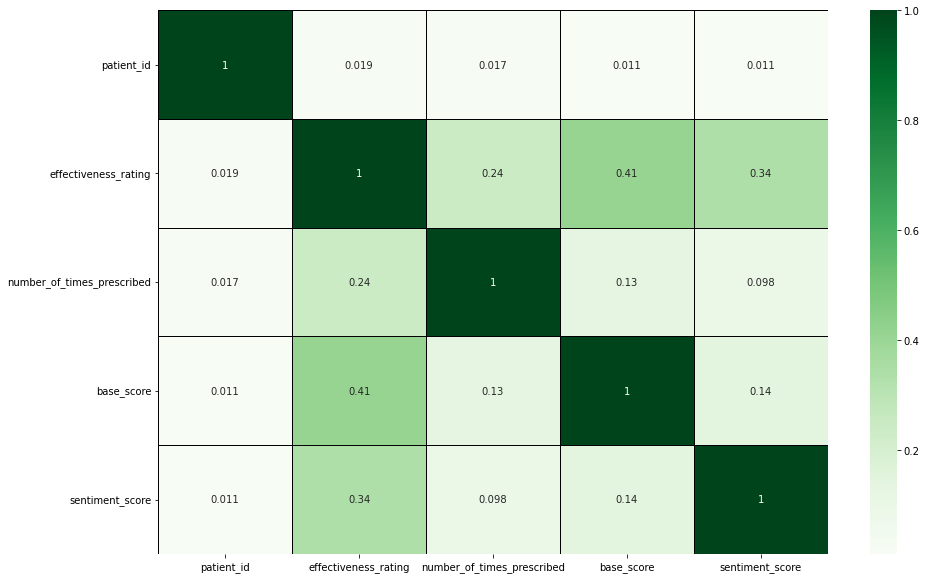

In [125]:
cor = df_train.corr() 

plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True, cmap = 'Greens',  linecolor ='black', linewidths = 1) 


## Effectiveness Rating Distribution plot

From the distribution plot we can observe that there are higher rating given by the patients for most of the drugs.

<AxesSubplot:title={'center':'Distribution of Ratings'}, xlabel='Rating', ylabel='Count'>

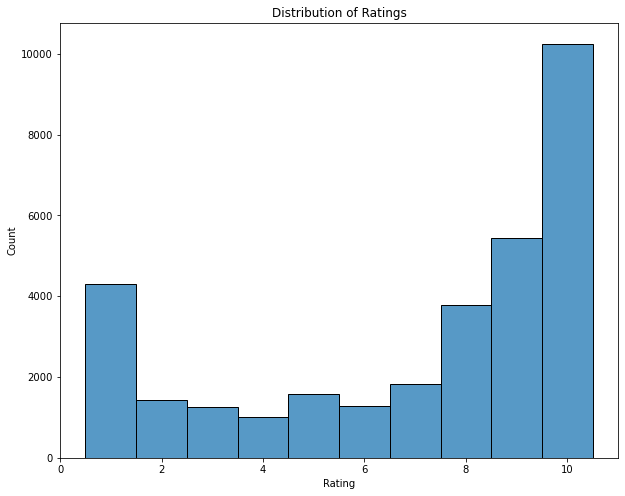

In [138]:
#PLoting graph
plt.figure(figsize = (10,8))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

sns.histplot(data = df_train, x = 'effectiveness_rating', discrete = True)

## Sentiment Analysis Distribution 

From the plot we can say that there are more number of neutral review as compared to the positive and negative.

<AxesSubplot:title={'center':'Sentiment Rating'}, xlabel='Score', ylabel='Count'>

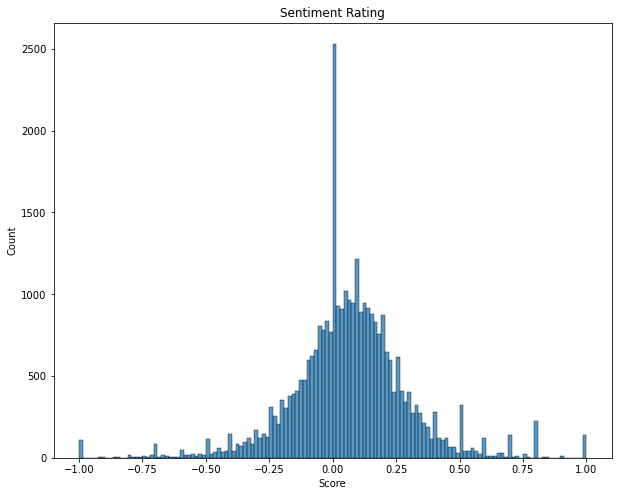

In [140]:
#PLoting graph
plt.figure(figsize = (10,8))
plt.title('Sentiment Rating')
plt.xlabel('Score')
plt.ylabel('Count')
sns.histplot(data = df_train, x = 'sentiment_score')

# Model Developyment

### As the effectiveness rating of the drug is given so, there is no need to include the name of the drug 

### Dropping the unnecessary features 

In [87]:
df_train_new.head()

,effectiveness_rating,number_of_times_prescribed,base_score,sentiment
0,9,27,8.022969,neutral
1,8,192,7.858458,positive
2,5,17,6.341969,positive
3,9,37,6.590176,positive
4,2,43,6.144782,positive


In [84]:

df_train_new = df_train.drop(["patient_id","name_of_drug","use_case_for_drug","review_by_patient","drug_approved_by_UIC","sentiment_score"],axis=1)

df_train_new.head()

,effectiveness_rating,number_of_times_prescribed,base_score,sentiment
0,9,27,8.022969,neutral
1,8,192,7.858458,positive
2,5,17,6.341969,positive
3,9,37,6.590176,positive
4,2,43,6.144782,positive


In [85]:

df_test_new = df_test.drop(["patient_id","name_of_drug","use_case_for_drug","review_by_patient","drug_approved_by_UIC","sentiment_score"],axis=1)

df_test_new.head()

,number_of_times_prescribed,effectiveness_rating,sentiment
0,22,10,negative
1,35,9,positive
2,13,4,positive
3,21,7,positive
4,44,2,negative


In [88]:
# Making dummy columns for the categorical values 

df_train_new = pd.get_dummies(data = df_train_new, columns = ['sentiment'], drop_first = True)
df_train_new.head()

,effectiveness_rating,number_of_times_prescribed,base_score,sentiment_neutral,sentiment_positive
0,9,27,8.022969,1,0
1,8,192,7.858458,0,1
2,5,17,6.341969,0,1
3,9,37,6.590176,0,1
4,2,43,6.144782,0,1


In [89]:
# Making dummy columns for the categorical values 

df_test_new = pd.get_dummies(data = df_test_new, columns = ['sentiment'], drop_first = True)
df_test_new.head()

,number_of_times_prescribed,effectiveness_rating,sentiment_neutral,sentiment_positive
0,22,10,0,0
1,35,9,0,1
2,13,4,0,1
3,21,7,0,1
4,44,2,0,0


In [90]:
# Making new dataset of Predictor

X = df_train_new.drop(['base_score'], axis= 1)
X.head()

,effectiveness_rating,number_of_times_prescribed,sentiment_neutral,sentiment_positive
0,9,27,1,0
1,8,192,0,1
2,5,17,0,1
3,9,37,0,1
4,2,43,0,1


In [92]:
# Making new dataset of target

Y = df_train_new['base_score']
Y.head()

0    8.022969
1    7.858458
2    6.341969
3    6.590176
4    6.144782
Name: base_score, dtype: float64

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [94]:
# Importing the random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, n_jobs= -1)

rf_reg.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [95]:
from sklearn.metrics import mean_squared_error
import math

In [96]:
# prediction on train data set 
train_pred = rf_reg.predict(X_train)
mse_train_pred = mean_squared_error(y_train, train_pred)
train_rmse = math.sqrt(mse_train_pred)
print(train_rmse)

0.055399386571976385


In [97]:
# R2 value for the training dataset
from sklearn.metrics import r2_score
r2_score(y_train, train_pred)

0.9987821241554017

In [98]:
# prediction on val data set 
test_pred = rf_reg.predict(X_test)
mse_test_pred = mean_squared_error(y_test, test_pred)
test_rmse = math.sqrt(mse_test_pred)
print(test_rmse)

0.13078647340048768


In [99]:
# R2 value for the validation dataset
from sklearn.metrics import r2_score
r2_score(y_test, test_pred)

0.9932624904330613

# Prediction on the test dataset¶

In [103]:
df_test_new.head()

,number_of_times_prescribed,effectiveness_rating,sentiment_neutral,sentiment_positive
0,22,10,0,0
1,35,9,0,1
2,13,4,0,1
3,21,7,0,1
4,44,2,0,0


In [102]:
# prediction on test data set 
final_pred = rf_reg.predict(df_test_new)

In [149]:
final_result = df_test['patient_id']

final_result = pd.DataFrame(final_result)

final_result.head()

,patient_id
0,163740
1,39293
2,208087
3,23295
4,97013


In [150]:
final_result['base_score'] = final_pred

In [151]:
final_result['base_score'].max()

8.981228211240332

In [152]:
final_result['base_score'].min()

1.2680069857221348

In [153]:

final_result.to_csv('final_result.csv',index=False) 

final_result.head()

,patient_id,base_score
0,163740,8.574486
1,39293,8.656797
2,208087,8.358951
3,23295,6.493653
4,97013,8.074493


# Converting To Pickle File 

In [154]:
# Importing pickle 
import pickle

In [155]:
# save the model to disk
file = 'Drugs.pkl'
pickle.dump(rf_reg, open(file, 'wb'))